In [1]:
import numpy as np
import matplotlib.animation as ani  #importing animation libraryimport numpy as np
import matplotlib.pyplot as plt  #import plotting library
from matplotlib import cm  #import color for surface plot

In [2]:
# константы
alpha = 97  # (mm^2/s) thermal diffusivity, alluminum
#length of sides  of heated square plate
Lx = 152  #(mm)
Ly = 152  #(mm)
#number of points
N = 50  #number of x and y points x*y = total number of points
time = 30  #sec, how long i want to run the simulations for


In [3]:
# задаем параметры
#Discretize my space
Xvec = np.linspace(0, Lx, N)
Yvec = np.linspace(0, Ly, N)
dx = Xvec[2] - Xvec[1]  #since equally spaced, i set a constant dx
dy = Yvec[2] - Yvec[1]  #since equally spaced, I set a constant dy

#Discretize time
dt = 0.5 * (dx ** 2) / (2 * alpha)  #dt needed for stability can do larger however good rule of thumb
tvec = np.linspace(0, 1, 100)  #this is how long i run my numerical approximation. 0 to 100 sec
#Inital Boundary Conditions
T = np.full((Yvec.size, Xvec.size), 20.0)  #entire plate is at 20 degrees C

#200 degrees C applied to borders
T[:, 0] = 200.0
T[-1, :] = 200.0
T[0, :] = 200.0
T[:, -1] = 200.0
# for i in range(Yvec.size):
#     T[i, 0] = T[0, i] = T[-1, i] = T[i, -1] = 150 + 50 * np.sin(i / 40)

frn = 100
Tout = np.zeros((frn, Yvec.size, Xvec.size))

In [4]:
for i in range(0, frn):
    Told = T

    for ty in range(1, Yvec.size - 1):
        for tx in range(1, Xvec.size - 1):
            du = dt * (alpha * (Told[tx + 1, ty] - 2 * Told[tx, ty] + Told[tx - 1, ty]) / dx ** 2 +
                       alpha * (Told[tx, ty + 1] - 2 * Told[tx, ty] + Told[tx, ty - 1]) / dy ** 2)
            T[tx, ty] += du

    Tout[i] = T

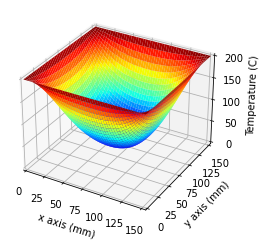

In [5]:
def frame(frame_number, Tout, plot):
    plot[0].remove()
    plot[0] = axis.plot_surface(X, Y, Tout[frame_number, :, :], cmap=cm.jet)

fig = plt.figure()
axis = plt.axes(projection="3d")
axis.set_xlabel('x axis (mm)')
axis.set_ylabel('y axis (mm)')
axis.set_zlabel('Temperature (C)')
axis.set_xlim(0, Lx)
axis.set_ylim(0, Ly)
axis.set_zlim(0, 200)
X = np.linspace(0, Lx, N)
Y = np.linspace(0, Ly, N)
X, Y = np.meshgrid(X, Y)

plot = [axis.plot_surface(X, Y, Tout[0, :, :])]
animation = ani.FuncAnimation(fig, frame, frn, fargs=(Tout, plot), interval=30, blit=False)
animation.save('test.mp4', writer=ani.FFMpegWriter(fps=30))